In [61]:
from pyvis.network import Network
from functools import reduce
import pandas as pd
import json

# Opening JSON files... also turning them into Python Dictionaries??
with open('../api/devices/all.json', 'r') as openfile:
    all = json.load(openfile)

with open('../api/devices/phydot11_accesspoints.json', 'r') as openfile:
    aps = json.load(openfile)

with open('../api/devices/phy-Bluetooth.json', 'r') as openfile:
    blue = json.load(openfile)

with open('../api/devices/phy-IEEE802.11.json', 'r') as openfile:
    wlan = json.load(openfile)

#print(all)

# Collecting info on all devices
all_df = pd.DataFrame()

all_count = 0

for device in all:    
    all_data = {
        "key": [device['kismet.device.base.key']], 
        "device_name": [device['kismet.device.base.name']],
        "device_type": [device['kismet.device.base.type']],
        "num_packets": [device['kismet.device.base.packets.total']],
        "manuf": [device['kismet.device.base.manuf']], 
        "macaddr": [device['kismet.device.base.macaddr']],
        "channel": [device['kismet.device.base.channel']],
        "first_seen": [device['kismet.device.base.first_time']], 
        "last_seen": [device['kismet.device.base.last_time']],
        "server_uuid": [device['kismet.server.uuid']]
    }
    all_count += 1
    
    all_df = pd.concat([all_df, pd.DataFrame(all_data)], ignore_index=True)

print("All Devices:", all_count, "len:", len(all_df))

# Collecting info on wlan devices
wlan_df = pd.DataFrame()

wlan_count = 0

for device in wlan:    
    wlan_data = {
        "key": [device['kismet.device.base.key']], 
        "device_name": [device['kismet.device.base.name']],
        "device_type": [device['kismet.device.base.type']],
        "num_packets": [device['kismet.device.base.packets.total']],
        "manuf": [device['kismet.device.base.manuf']], 
        "macaddr": [device['kismet.device.base.macaddr']],
        "channel": [device['kismet.device.base.channel']],
        "first_seen": [device['kismet.device.base.first_time']], 
        "last_seen": [device['kismet.device.base.last_time']],
        "server_uuid": [device['kismet.server.uuid']]
    }
    wlan_count += 1
    
    wlan_df = pd.concat([wlan_df, pd.DataFrame(wlan_data)], ignore_index=True)

print("WLAN Devices:", wlan_count, "len:", len(wlan_df))

# Collecting info on bluetooth devices
blue_df = pd.DataFrame()

blue_count = 0

for device in blue:    
    blue_data = {
        "key": [device['kismet.device.base.key']], 
        "device_name": [device['kismet.device.base.name']],
        "device_type": [device['kismet.device.base.type']],
        "num_packets": [device['kismet.device.base.packets.total']],
        "manuf": [device['kismet.device.base.manuf']], 
        "macaddr": [device['kismet.device.base.macaddr']],
        "channel": [device['kismet.device.base.channel']],
        "first_seen": [device['kismet.device.base.first_time']], 
        "last_seen": [device['kismet.device.base.last_time']],
        "server_uuid": [device['kismet.server.uuid']]
    }
    blue_count += 1
    
    blue_df = pd.concat([blue_df, pd.DataFrame(blue_data)], ignore_index=True)

print("Bluetooth Devices:", blue_count, "len:", len(blue_df))

# Collecting info on access points
aps_df = pd.DataFrame()

aps_count = 0

for device in aps:    
    aps_data = {
        "key": [device['kismet.device.base.key']], 
        "device_name": [device['kismet.device.base.name']],
        "device_type": [device['kismet.device.base.type']],
        "num_packets": [device['kismet.device.base.packets.total']],
        "manuf": [device['kismet.device.base.manuf']], 
        "macaddr": [device['kismet.device.base.macaddr']],
        "channel": [device['kismet.device.base.channel']],
        "first_seen": [device['kismet.device.base.first_time']], 
        "last_seen": [device['kismet.device.base.last_time']],
        "server_uuid": [device['kismet.server.uuid']]
    }
    aps_count += 1
    
    aps_df = pd.concat([aps_df, pd.DataFrame(aps_data)], ignore_index=True)

print("Access Points:", aps_count, "len:", len(blue_df))


# Finding intersecting elements
#list(reduce(set.intersection, map(set, [aps_df.macaddr, wlan_df.macaddr])))
#list(reduce(set.intersection, reduce(set.union, map(set, [aps_df.macaddr, wlan_df.macaddr, blue_df.macaddr]))), reduce(set, [all_df]))
#reduce(set.union, map(set, [aps_df.macaddr, wlan_df.macaddr, blue_df.macaddr]))
#reduce(set, [all_df])
#list(reduce(set.intersection, map(set, [aps_df.macaddr, wlan_df.macaddr])))
a = set(aps_df.macaddr)
b = set(wlan_df.macaddr)
c = set(blue_df.macaddr)
d = set(all_df.macaddr)
e = reduce(set.union, [a,b,c])
f = reduce(set.difference, [d, e])
print(len(e))
print(len(reduce(set.difference, [b, d])))
list(f)
print(len(f))
#g = d.issuperset(e)
#print(g)

All Devices: 1416 len: 1416
WLAN Devices: 1111 len: 1111
Bluetooth Devices: 303 len: 303
Access Points: 63 len: 303
1414
0
2


Note: When I also counted the access points, #access points + # WLAN devices + # Bluetooth Devices > # All Devices,
so I'm going to look into what overlap might be happening between aps/wlan/bluetooth and why.
Something else of note: 

<Axes: xlabel='Manufacturer', ylabel='Number of Devices'>

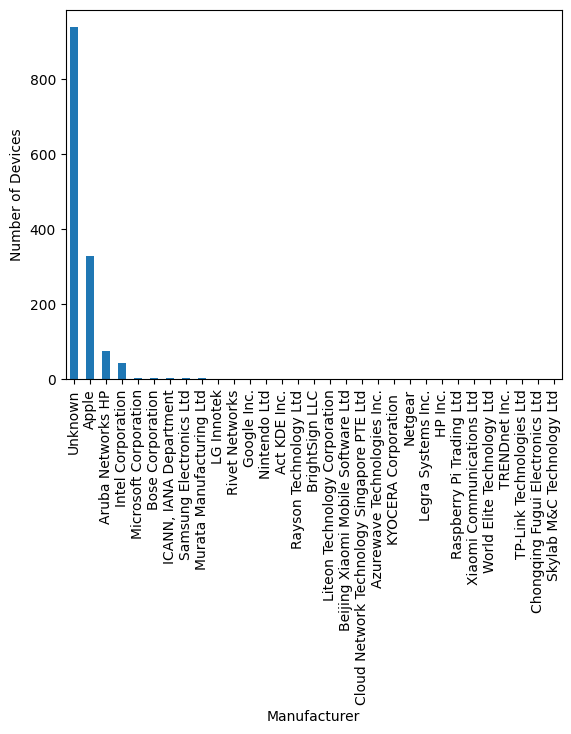

In [55]:
all_df['manuf'].value_counts().plot(kind='bar', ylabel="Number of Devices", xlabel="Manufacturer")

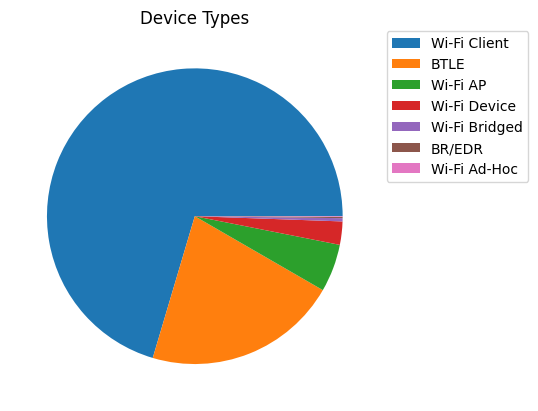

In [54]:
# Graph

graph = all_df['device_type'].value_counts().plot(kind='pie', legend=True, title="Device Types", labeldistance=None, ylabel='')
#graph = all_df['device_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, title="Device Types", labeldistance=None, ylabel='')
graph.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
#all_df['device_type'].value_counts().plot(kind='scatter', title="Device Types")

#all_df['manuf'].value_counts().plot(kind='pie')
#all_df['manuf'].value_counts().plot(kind='line')